In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


In [3]:
car_df = pd.read_csv("cars_data/car.data")
print('Dataset Loaded...')
car_df.head()

#creating the feature set


Dataset Loaded...


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
numerical = car_df.drop(columns=['class', 'buying', 'maint', 'lug_boot', 'safety'], axis=1)
numerical

,doors,persons
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
...,...,...
1723,5more,more
1724,5more,more
1725,5more,more
1726,5more,more


In [5]:
myMapNum = {'5more': 5, 'more': 5}
newNum = numerical.replace(myMapNum)
newNum

,doors,persons
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
...,...,...
1723,5,5
1724,5,5
1725,5,5
1726,5,5


In [6]:
# buying:   vhigh, high, med, low.
# maint:    vhigh, high, med, low.
# doors:    2, 3, 4, 5more.
# persons:  2, 4, more.
# lug_boot: small, med, big.
# safety:   low, med, high.
# class: unacc, acc, good, vgood

In [7]:
categorical = car_df.filter(['buying', 'maint', 'lug_boot', 'safety','class'])
categorical

,buying,maint,lug_boot,safety,class
0,vhigh,vhigh,small,low,unacc
1,vhigh,vhigh,small,med,unacc
2,vhigh,vhigh,small,high,unacc
3,vhigh,vhigh,med,low,unacc
4,vhigh,vhigh,med,med,unacc
...,...,...,...,...,...
1723,low,low,med,med,good
1724,low,low,med,high,vgood
1725,low,low,big,low,unacc
1726,low,low,big,med,good


In [8]:
myMapCat = {'vhigh': 4, 'high': 3, 'med': 2, 'low': 1, 'small': 1, 'big': 3, 'unacc': 1, 'acc': 2, 'good': 3, 'vgood': 4}
newCat = categorical.replace(myMapCat)
newCat

,buying,maint,lug_boot,safety,class
0,4,4,1,1,1
1,4,4,1,2,1
2,4,4,1,3,1
3,4,4,2,1,1
4,4,4,2,2,1
...,...,...,...,...,...
1723,1,1,2,2,3
1724,1,1,2,3,4
1725,1,1,3,1,1
1726,1,1,3,2,3


In [9]:
myTable = pd.concat([newNum, newCat], axis=1)
myTable

,doors,persons,buying,maint,lug_boot,safety,class
0,2,2,4,4,1,1,1
1,2,2,4,4,1,2,1
2,2,2,4,4,1,3,1
3,2,2,4,4,2,1,1
4,2,2,4,4,2,2,1
...,...,...,...,...,...,...,...
1723,5,5,1,1,2,2,3
1724,5,5,1,1,2,3,4
1725,5,5,1,1,3,1,1
1726,5,5,1,1,3,2,3


In [11]:
X = myTable.drop(['class'], axis=1)
X
# train_test_split(X)


,doors,persons,buying,maint,lug_boot,safety
0,2,2,4,4,1,1
1,2,2,4,4,1,2
2,2,2,4,4,1,3
3,2,2,4,4,2,1
4,2,2,4,4,2,2
...,...,...,...,...,...,...
1723,5,5,1,1,2,2
1724,5,5,1,1,2,3
1725,5,5,1,1,3,1
1726,5,5,1,1,3,2


In [12]:
y = myTable.filter(['class'])
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
1723,3
1724,4
1725,1
1726,3


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.40,random_state=0)

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [62]:
#RANDOM FOREST CLASSIFIER
# rf_clf = RandomForestClassifier(random_state=42, n_estimators=500)
# classifier = rf_clf.fit(X_train, y_train.values.ravel())

In [52]:
#LOGISTIC REGRESSION
# log_clf = LogisticRegression()
# clf = OneVsRestClassifier(log_clf)
# classifier = clf.fit(X_train, y_train.values.ravel())

In [67]:
# Naive Bayes
# nb_clf = GaussianNB()
# clf = OneVsRestClassifier(nb_clf)
# classifier = clf.fit(X_train, y_train.values.ravel())

In [78]:
#ID3 Decision tree
tree_clf = DecisionTreeClassifier(criterion='entropy')
clf = OneVsRestClassifier(tree_clf)
classifier = clf.fit(X_train, y_train.values.ravel())

In [79]:
#make predictions on the test set
y_pred = classifier.predict(X_test)
len(y_pred)

692

In [80]:
#evaluating the algorithm on the test set 
score = accuracy_score(y_test, y_pred)
score

0.9696531791907514

              precision    recall  f1-score   support

           1       1.00      0.98      0.99       480
           2       0.94      0.94      0.94       155
           3       0.90      0.93      0.92        29
           4       0.79      0.96      0.87        28

    accuracy                           0.97       692
   macro avg       0.91      0.95      0.93       692
weighted avg       0.97      0.97      0.97       692



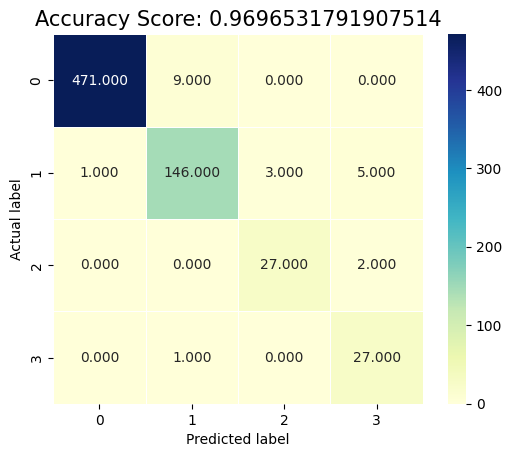

In [81]:
#Calculate confusion matrix and accuracy score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='YlGnBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15);
# print('Logistic Regression Metrics')
# print('Random Forest Classification Metrics')
# print("Naive Bayes' Classification Metrics")
# print("ID3 Deision Trees")
print(classification_report(y_test, y_pred))